This notebook demonstrates how to perfomr systematic the policy assessment and render the policy cards. 

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from res_ind_lib import *

#Imports the function to plot render the policy experiments
from policy_assessment import *

#ask jupyter to display the plots within this notebook
%matplotlib inline

# Data

## baseline data

In [2]:
#Load the excel data file into a dataframe (table)
df_original=pd.read_excel("inputs/all_data_compiled.xlsx", 
                 index_col=0, #tells Pandas to use the first column (Provinces) as the index of the table
                 skiprows=[0, 2] #The first (0) row is a description of the variables and the 3rd (2) row is empty. We skip them
                ).dropna() 
df_original.index.name="province"
#Displays the first rows of that dataframe
df_original=def_ref_values(df_original)


## policy experiment data

In [3]:
##POLICY DESCRIPTION
policy_info= pd.read_csv("inputs/policy_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels = policy_info.descriptor.copy() #we make a copy so we can modify it later
policy_labels.head()

#size of the policy
pol_increment = policy_info.increment    

# Parameters

In [4]:
colors = pd.read_csv("inputs/colors_pol_assess.csv", index_col=0)
colors

,color,edgecolor,alpha
dWtot_currency,#a6cee3,#1f78b4,1
dKtot,#cccccc,#969696,1


In [5]:
#unit for welfare and asset loses changes
unit = dict(multiplier = 1e-3, string = "million pesos per year"       )

In [6]:
pol_assess_set = colors.index

# Checking for out of bound problems

In [7]:
bounds= pd.read_csv("inputs/inputs_info.csv", index_col="key")
bounds.head(3)   

,descriptor,inf,sup
key,,,
avg_prod_k,Productivity of capital,0,10
axfin_p,Access to finance for poor people,0,1
axfin_r,Access to finance for non-poor people,0,1


In [8]:
clipped = check_bounds(df_original+pol_increment, bounds)

# Computing

In [9]:
deltas = compute_policies(df_original,pol_increment,pol_assess_set, bounds)
deltas.head()

Currently working on:  done.


province            Abra                Agusan Del Norte                 \
outputs            dKtot dWtot_currency            dKtot dWtot_currency   
inputs                                                                    
T_rebuild_K     0.000000    3124.553480         0.000000   29339.777463   
fap           733.100239    2201.625059      5187.736943   13273.356790   
far          2047.106242    1762.854010      9746.944849    4947.262100   
pi          -2616.593747   -4019.457674    -23338.524707  -31482.288922   
pov_head      178.002089     564.434343      4267.702393   10962.452027   

province    Agusan Del Sur                        Aklan                 \
outputs              dKtot dWtot_currency         dKtot dWtot_currency   
inputs                                                                   
T_rebuild_K       0.000000   12637.004383      0.000000       0.000000   
fap            6424.716520   16905.385553  15760.360463   39933.547460   
far            6623.837036    5015.110905  36039.063680   38651.867793   
pi            -7371.976022  -13560.647557      0.000000       0.000000   
pov_head       1306.644937    3377.747685      0.000000       0.000000   

province            Albay                     ...           Tawi-Tawi  \
outputs             dKtot dWtot_currency      ...               dKtot   
inputs                                        ...                       
T_rebuild_K      0.000000       0.000000      ...            0.000000   
fap          51732.612863  130721.336820      ...        13162.055301   
far          62784.781665   45350.267081      ...        18262.064547   
pi               0.000000       0.000000      ...            0.000000   
pov_head         0.000000       0.000000      ...            0.000000   

province                        Zambales                Zamboanga Del Norte  \
outputs     dWtot_currency         dKtot dWtot_currency               dKtot   
inputs                                                                        
T_rebuild_K       0.000000      0.000000       0.000000            0.000000   
fap           39425.773052   9512.853056   25377.215674        50242.515552   
far           27640.756283  60409.270893   35532.077102        29002.055971   
pi                0.000000      0.000000       0.000000            0.000000   
pov_head          0.000000      0.000000       0.000000            0.000000   

province                   Zamboanga Del Sur                Zamboanga Sibugay  \
outputs     dWtot_currency             dKtot dWtot_currency             dKtot   
inputs                                                                          
T_rebuild_K       0.000000          0.000000    8156.952484          0.000000   
fap          134987.517318       9228.930741   25022.459659      29020.262292   
far           31690.645914      18623.960950   12785.373740      24149.863746   
pi                0.000000      -5391.028775   -8002.288369          0.000000   
pov_head          0.000000       1058.972388    2876.109302          0.000000   

province                    
outputs     dWtot_currency  
inputs                      
T_rebuild_K       0.000000  
fap           76743.621804  
far           22050.748846  
pi                0.000000  
pov_head          0.000000  

[5 rows x 148 columns]

# actual drawing

In [10]:
deltas.index

Index(['T_rebuild_K', 'fap', 'far', 'pi', 'pov_head', 'protection',
       'rel_gdp_pp', 'share1', 'shew', 'sigma_p', 'sigma_r', 'social_p',
       'social_r', 'v_p', 'v_r'],
      dtype='object', name='inputs')

Currently working on:  Bulacan


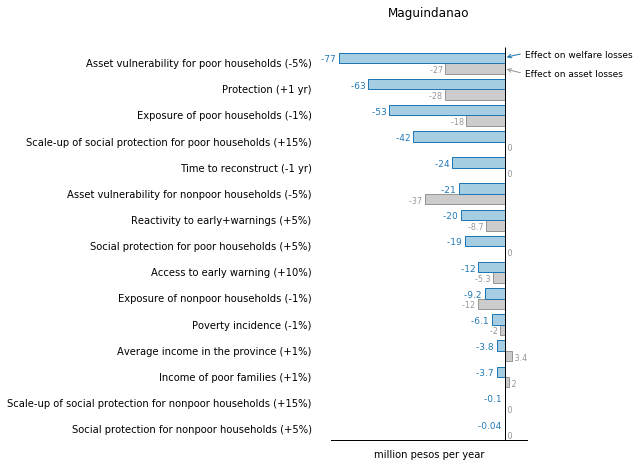

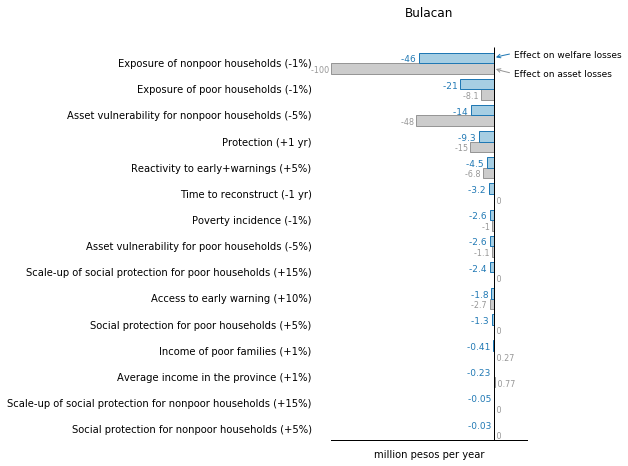

In [11]:
render_pol_cards(
    deltas,
    colors,
    policy_labels,
    pol_increment,
    unit,
        ["Maguindanao", "Bulacan"])
#     df_original.index)


# Merge all cards to single pdf

Merges the individual province cards into one big multi page pdf. Requires ghostscript.

In [19]:
province_list=glob.glob("cards/*.pdf")
merge_cardfiles(province_list,"all_cards.pdf")

Merging cards....
Merging cards done


Converts the pdf files to png images. Requires Imagemagick.

In [13]:
convert_pdf_to_png("cards/")

Converting cards....
conversion to png done


# Demo: policy experiments on the multi-hazard data

Here we demonstrate how to do policy experiments on the multi hazard data. This is just a demo as the data we have now prevents us to have meaningful experiments (river floods and costal floods)

In [14]:
multi_hard_info=pd.read_csv("inputs/multi_hazard_data.csv", index_col=["province","hazard"])
multi_hard_info.head()

fap       far
province         hazard                    
Abra             coast   0.000000  0.000000
                 river   0.188715  0.149419
Agusan Del Norte coast   0.114415  0.091571
                 river   0.365700  0.292684
Agusan Del Sur   coast   0.011681  0.008747

In [15]:
fr=pd.read_csv("inputs/fa_ratios.csv", index_col=("province","hazard")).dropna()
fr.columns = fr.columns.astype(float)
fr.head()

10        100
province         hazard               
Abra             river     1  1.814138
                 coast     1  1.000000
Agusan Del Norte river     1  1.081761
                 coast     1  1.000000
Agusan Del Sur   river     1  1.335951

## policy experiments on mh data

In [16]:
##POLICY DESCRIPTION
policy_info_mh= pd.read_csv("inputs/policy_multihazard_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels_mh = policy_info_mh.descriptor.copy() #we make a copy so we can modify it later
policy_labels_mh.head()

#size of the policy
pol_increment_mh = policy_info_mh.increment    
pol_increment_mh.head()


key
('fap', 'coast')    0.01
('fap', 'river')    0.01
('far', 'coast')    0.01
('far', 'river')    0.01
Name: increment, dtype: float64

## computation

In [17]:
d_mh = compute_policies_mh(df_original,multi_hard_info,pol_increment_mh,pol_assess_set, bounds, fa_ratios=fr, multihazard_data =multi_hard_info)

Currently working on:  done.


## baseline mh data

Currently working on:  Maguindanao


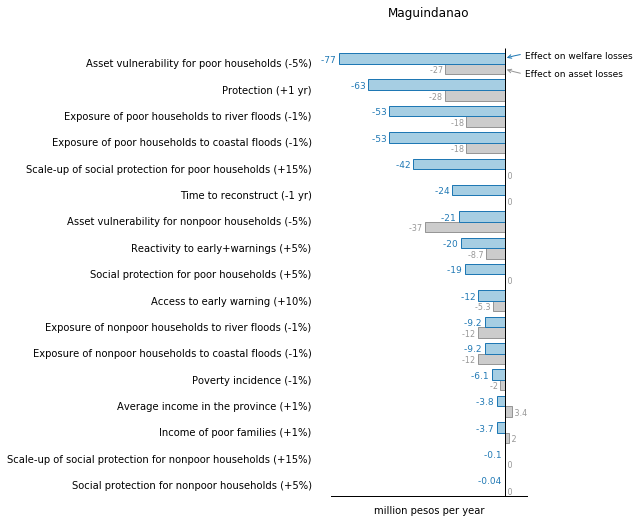

In [18]:
render_pol_cards(
    deltas.append(d_mh).drop("fap").drop("far"), #drop fap and far because superseded by multihazard info
    colors,
    policy_labels.append(policy_labels_mh),
    pol_increment.append(pol_increment_mh),
    unit,["Maguindanao"],
    outfolder="cards_coast_river/"
)

